# 

In [71]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import numpy as np
import matplotlib.pyplot as plt

In [72]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [73]:
x_test.shape

(10000, 32, 32, 3)

In [74]:
x_train.shape

(50000, 32, 32, 3)

In [75]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [76]:
y_train=y_train.flatten()
y_test=y_test.flatten()

In [77]:
y_test.shape

(10000,)

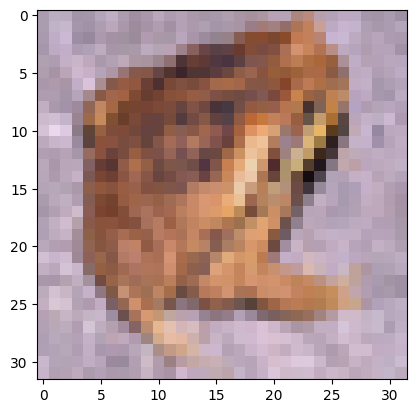

In [78]:
plt.imshow(x_train[355])

In [79]:
x_train=x_train /255.0
x_test=x_test/ 255.0

In [80]:
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="softmax")
    
])

C:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs=5)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

In [55]:
y_pred_classes = [np.argmax(element) for element in y_pred]

In [56]:
y_test.shape

(50000,)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.23      0.31      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.14      0.83      0.24      1000
           5       0.00      0.00      0.00      1000
           6       0.33      0.08      0.13      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.21      0.68      0.32      1000

    accuracy                           0.18     10000
   macro avg       0.12      0.18      0.10     10000
weighted avg       0.12      0.18      0.10     10000



C:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [83]:
import seaborn as sns

In [85]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[229,   0,   0,   0, 328,   0,  11,   0,   0, 432],
       [ 10,   0,   0,   0, 530,   0,  34,   0,   0, 426],
       [ 69,   0,   0,   0, 725,   0,  25,   0,   0, 181],
       [ 36,   0,   0,   0, 752,   0,  30,   0,   0, 182],
       [ 17,   0,   0,   0, 834,   0,  18,   0,   0, 131],
       [ 34,   0,   0,   0, 790,   0,  20,   0,   0, 156],
       [ 10,   0,   0,   0, 760,   0,  81,   0,   0, 149],
       [ 12,   0,   0,   0, 627,   0,  15,   0,   0, 346],
       [ 39,   0,   0,   0, 334,   0,   4,   0,   0, 623],
       [ 12,   0,   0,   0, 301,   0,   9,   0,   0, 678]], dtype=int64)

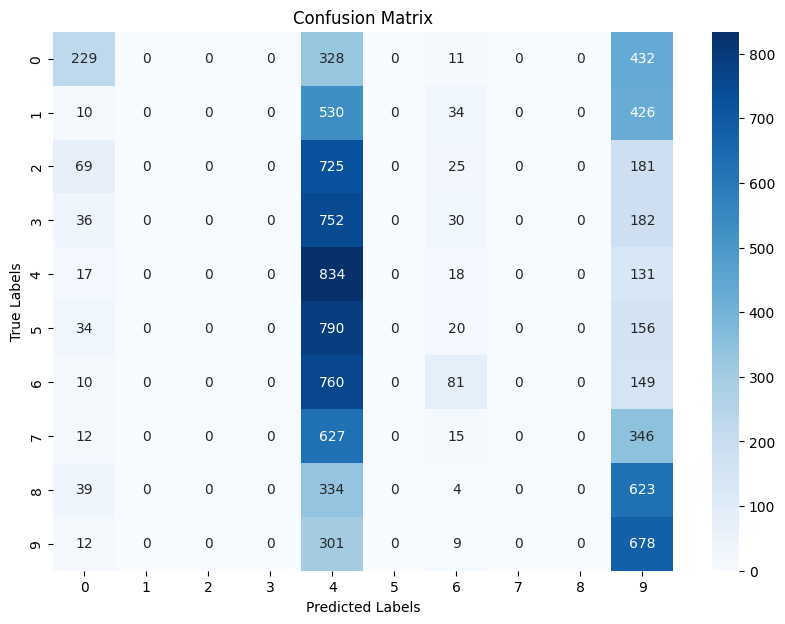

In [86]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [97]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

layers.Flatten(),
layers.Dense(64,activation="relu"),
layers.Dense(10,activation="softmax")


                      ])

In [98]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [105]:
cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6029 - loss: 1.1376
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6518 - loss: 0.9956
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6819 - loss: 0.9104
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7095 - loss: 0.8298
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7319 - loss: 0.7746


In [106]:
cy_pred=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [107]:
cy_pred=np.argmax(cy_pred,axis=1)

In [108]:
print(classification_report(y_test,cy_pred))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1000
           1       0.89      0.67      0.77      1000
           2       0.69      0.51      0.59      1000
           3       0.58      0.47      0.52      1000
           4       0.56      0.75      0.64      1000
           5       0.62      0.59      0.61      1000
           6       0.76      0.79      0.78      1000
           7       0.77      0.73      0.74      1000
           8       0.68      0.86      0.76      1000
           9       0.68      0.85      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [109]:
print(confusion_matrix(cy_pred,y_test))

[[685  27  61  23  11  10   7  17  48  24]
 [  8 671   5   8   1   7   2   5  14  31]
 [ 32   1 508  47  34  44  36  24   6   4]
 [ 17   8  46 469  38 151  37  27   8   6]
 [ 36  11 154 112 752  82  69 101   7   8]
 [  4   9  69 163  25 595  22  63   4   6]
 [  7   8  62  78  47  29 793  11   4   5]
 [ 12   8  46  32  50  44   5 726   8  18]
 [150  53  27  43  34  25  13   7 861  48]
 [ 49 204  22  25   8  13  16  19  40 850]]
